In [2]:
import pandas as pd

#Load the dataset.
file_path = "/content/diabetic_data.csv"
df = pd.read_csv(file_path)

#Display basic information and first few rows.
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

(None,
    encounter_id  patient_nbr             race  gender      age weight  \
 0       2278392      8222157        Caucasian  Female   [0-10)      ?   
 1        149190     55629189        Caucasian  Female  [10-20)      ?   
 2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
 3        500364     82442376        Caucasian    Male  [30-40)      ?   
 4         16680     42519267        Caucasian    Male  [40-50)      ?   
 
    admission_type_id  discharge_disposition_id  admission_source_id  \
 0                  6                        25                    1   
 1                  1                         1                    7   
 2                  1                         1                    7   
 3                  1                         1                    7   
 4                  1                         1                    7   
 
    time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
 0                 1  ...          No      

<ipython-input-6-f27e23c3c783>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='time_in_hospital', data=df_cleaned, palette="Set2")


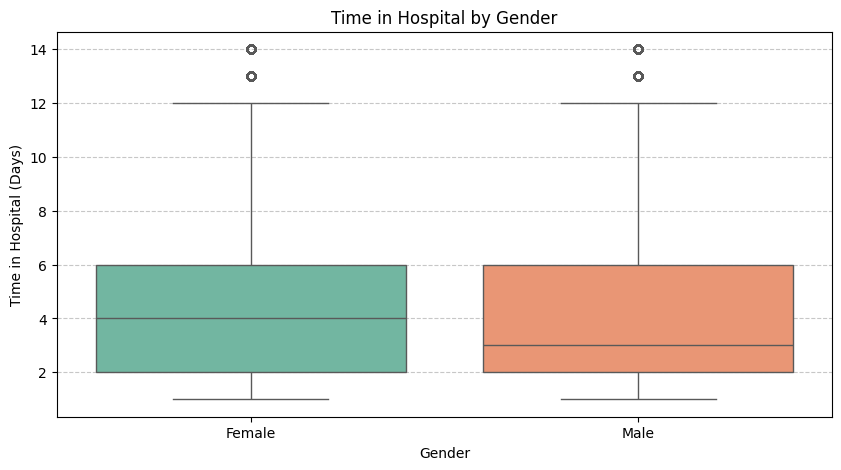

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,54708.0,4.478797,2.980388,1.0,2.0,4.0,6.0,14.0
Male,47055.0,4.299777,2.987703,1.0,2.0,3.0,6.0,14.0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#Cleaning: Ensure valid gender entries.
df_cleaned = df[df['gender'].isin(['Male', 'Female'])]

#Descriptive statistics.
stats = df_cleaned.groupby('gender')['time_in_hospital'].describe()

#Visualization: Distribution of hospital stay by gender.
plt.figure(figsize=(10,5))
sns.boxplot(x='gender', y='time_in_hospital', data=df_cleaned, palette="Set2")
plt.title('Time in Hospital by Gender')
plt.xlabel('Gender')
plt.ylabel('Time in Hospital (Days)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

stats

#Summary: Gender appears to have a minor impact on hospital stay duration for diabetic patients.

<ipython-input-7-bacfa3f31c25>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y='num_medications', data=df_cleaned_age, palette="coolwarm")


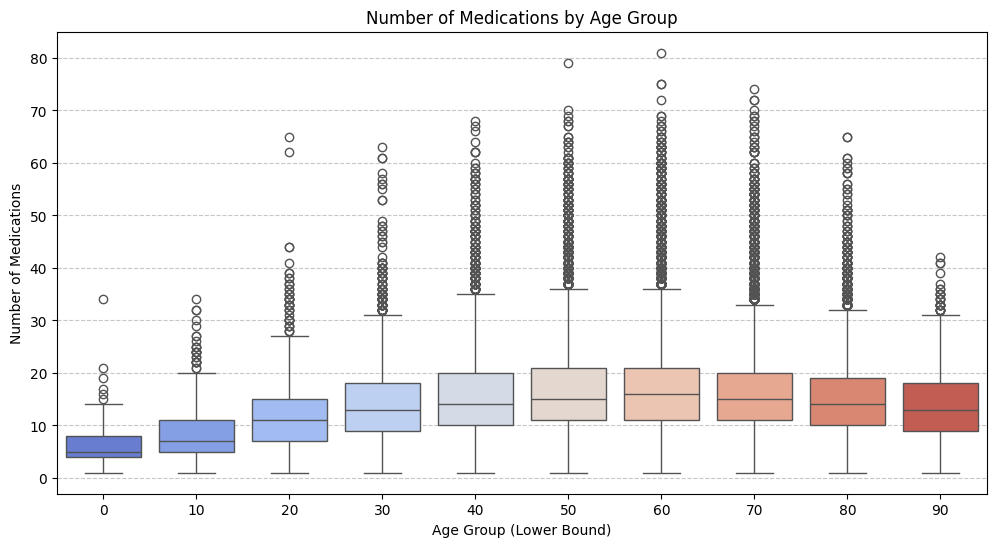

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
0,161.0,6.180124,4.061847,1.0,4.0,5.0,8.0,34.0
10,691.0,8.277858,5.358002,1.0,5.0,7.0,11.0,34.0
20,1657.0,11.972842,6.909778,1.0,7.0,11.0,15.0,65.0
30,3775.0,14.091656,7.618074,1.0,9.0,13.0,18.0,63.0
40,9685.0,15.391017,7.994733,1.0,10.0,14.0,20.0,68.0
50,17256.0,16.584492,8.606389,1.0,11.0,15.0,21.0,79.0
60,22482.0,17.150921,8.640616,1.0,11.0,16.0,21.0,81.0
70,26066.0,16.407427,8.048813,1.0,11.0,15.0,20.0,74.0
80,17197.0,15.326685,7.096388,1.0,10.0,14.0,19.0,65.0


In [7]:
#Cleaning: Ensure valid age entries and extract numerical ranges.
df_cleaned_age = df_cleaned.copy()
df_cleaned_age['age'] = df_cleaned_age['age'].str.extract('(\d+)-(\d+)')[0].astype(int)

#Descriptive statistics for number of medications by age group.
stats_age = df_cleaned_age.groupby('age')['num_medications'].describe()

#Visualization: Number of medications by age group.
plt.figure(figsize=(12,6))
sns.boxplot(x='age', y='num_medications', data=df_cleaned_age, palette="coolwarm")
plt.title('Number of Medications by Age Group')
plt.xlabel('Age Group (Lower Bound)')
plt.ylabel('Number of Medications')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

stats_age

#Summary: Data suggests that medication needs increase with age until around 60-70 years, after which they tend to stabilize or decrease slightly.